In [1]:
"""
Name: example.ipynb
Authors: Stephan Meighen-Berger
Example for the package
"""

'\nName: example.ipynb\nAuthors: Stephan Meighen-Berger\nExample for the package\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from fourth_day import Fourth_Day, config

In [6]:
# Some example settings
# Scenario
config['scenario']['population size'] = 1000
config['scenario']['duration'] = 500
config['scenario']['organism movement'] = True
config['scenario']['exclusion'] = False
config['scenario']['injection']['rate'] = 10
config['scenario']['injection']['y range'] = [0., 1.]
config['scenario']['encounters'] = False
# Organisms
config['organisms']['emission fraction'] = 0.1
config['organisms']['alpha'] = 1.
# Geometry
config['geometry']['volume'] = {
    'function': 'rectangle',
    'x_length': 10.,
    'y_length': 1.
}
# Water
config['water']['model']['name'] = 'parabolic'
config['water']['model']['norm'] = 0.01
config['water']['model']['time step'] = 1

In [7]:
# Creating a fourth_day object
fd = Fourth_Day()

In [8]:
# Launching solver
fd.sim()

In [9]:
fd.statistics[-1]

,species,pos_x,pos_y,velocity,angle,radius,energy,observed,max_emission,emission fraction,regeneration,is_emitting,emission_duration,encounter photons,shear photons,photons
0,Paraphyllina ransoni Russell,6.094410,0.559574,0.004879,0.629957,0.001058,1.000,True,27.505491,0.1,0.001,False,-500.0,0.0,0.0,0.0
1,Aeginura grimaldii Maas,2.141181,0.564818,0.003384,1.413768,0.000768,1.000,True,8.393156,0.1,0.001,False,-500.0,0.0,0.0,0.0
2,Praya dubia (Quoy and Gaimard),1.827744,0.720688,-0.003012,3.522342,0.000792,1.000,True,8.974659,0.1,0.001,False,-471.0,0.0,0.0,0.0
3,Nectopyramis natans (Bigelow),10.002114,0.408570,0.002074,1.709088,0.000959,1.000,False,9.558992,0.1,0.001,False,-167.0,0.0,0.0,0.0
4,Periphyllopsis braueri Vanhoeffen,5.357028,0.740991,0.002171,2.355386,0.001093,0.896,True,10.711722,0.1,0.001,False,-6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,Vogtia serrata (Moser),0.000000,0.284771,0.000000,0.000000,0.001275,1.000,True,8.769699,0.1,0.001,False,0.0,0.0,0.0,0.0
3496,Halitrephes maasi Bigelow,0.000000,0.730628,0.000000,0.000000,0.001130,1.000,True,9.890221,0.1,0.001,False,0.0,0.0,0.0,0.0
3497,Nausithoe atlantica Broch,0.000000,0.408230,0.000000,0.000000,0.000816,1.000,True,14.718078,0.1,0.001,False,0.0,0.0,0.0,0.0
3498,Photobacterium phosphoreum ANT-2200,0.000000,0.305214,0.000000,0.000000,0.000875,1.000,True,4.990043,0.1,0.001,False,0.0,0.0,0.0,0.0


In [10]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.5

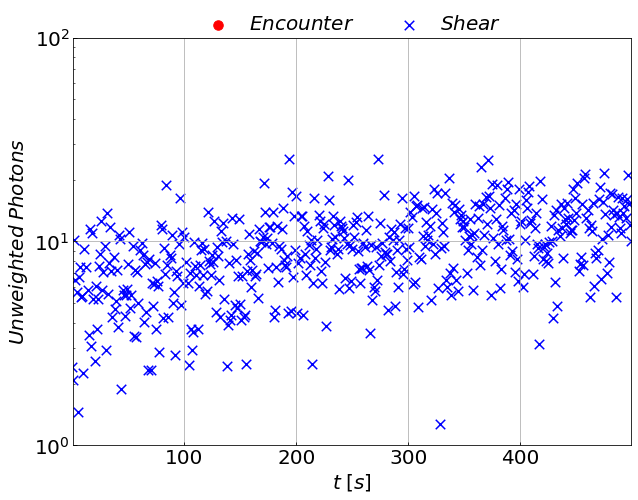

In [11]:
# Energy distributions
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
data_enc = np.array([np.sum(fd.statistics[i].loc[:, 'encounter photons'].values)
                     for i in range(len(fd.t))])
data_shear = np.array([np.sum(fd.statistics[i].loc[:, 'shear photons'].values)
                       for i in range(len(fd.t))])
data = np.array([np.sum(fd.statistics[i].loc[:, 'photons'].values)
                     for i in range(len(fd.t))])
ax1.scatter(fd.t,
            data_enc,
            s=lw*30, color='r', label=r'$Encounter$', marker="o")
ax1.scatter(fd.t,
            data_shear,
            s=lw*30, color='b', label=r'$Shear$', marker="x")
# ax1.scatter(fd.t,
#             data,
#             s=lw*30, color='k', label=r'$Total$', marker="+")
ax1.set_xlim(1e0, max(fd.t))
ax1.set_ylim(1e0, 1e2)
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax1.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h[:2],l[:2], loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
lgd2 = ax1.legend(h[2:],l[2:], loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
plt.show()

In [12]:
figure.savefig(PICS + "MC_Example.png",
               bbox_inches='tight')